In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Importing the librarires


In [3]:
#Lets import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# 2.Data Acquisition and Description

In [4]:
#Lets read out dataset
data = pd.read_csv('spotify_songs.csv')
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [5]:
#Lets look at the shape of our Dataset
print("Shape of Dataset :",data.shape)

Shape of Dataset : (32833, 23)


**Observations**
- We have 32,833 Rows of Data across 23 features.

In [6]:
#Lets look at data.info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [7]:
# Lets check for missing values
data.isna().sum().sort_values(ascending=False)

track_artist                5
track_album_name            5
track_name                  5
track_id                    0
key                         0
tempo                       0
valence                     0
liveness                    0
instrumentalness            0
acousticness                0
speechiness                 0
mode                        0
loudness                    0
danceability                0
energy                      0
playlist_subgenre           0
playlist_genre              0
playlist_id                 0
playlist_name               0
track_album_release_date    0
track_album_id              0
track_popularity            0
duration_ms                 0
dtype: int64

**Observations**
- Missing values observed in some features - track_artist,track_album_name and track_name.
- We can convert track_album_release_date dtype from object to datetime.


In [8]:
#Lets see data discription
data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


**Observations**
- track_popularity Ranges from 0-100. Average track popularity is 42.48.Their is a slight difference between the mean and median.  
- 25% of the track has popularity value above 62.
- avg. daceability value of songs in our dataset has value around 0.65
- avg. energy level of a song is 0.70. 25% of songs have an energy level above 0.84.
- 50% Songs have a duration 0f 216000ms which is 216 seconds or 3 minutes 36sec or 3.6 minutes. 
- We have a song which is 517810 ms long which is 8.63 minutes long.Surely we have an outleir in this feature. (We will see which song is this)

In [9]:
#Lets check for duplicate rows of data
data.duplicated().any()

False

**Observations**
- We dont have any duplicate rows in our dataset.

In [10]:
#Lets check for Cardinality
data.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

# 3.Data Preprocessing

In [10]:
#Lets impute the missing values

In [11]:
data.isna().sum().sort_values(ascending=False)

track_artist                5
track_album_name            5
track_name                  5
track_id                    0
key                         0
tempo                       0
valence                     0
liveness                    0
instrumentalness            0
acousticness                0
speechiness                 0
mode                        0
loudness                    0
danceability                0
energy                      0
playlist_subgenre           0
playlist_genre              0
playlist_id                 0
playlist_name               0
track_album_release_date    0
track_album_id              0
track_popularity            0
duration_ms                 0
dtype: int64

In [12]:
# Lets see which observations are these
data[data['track_artist'].isna()==True]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,southern hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,reggaeton,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,latin hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [13]:
#Since we have also 5 observations which have null values
#Lets remove these tracks

In [13]:
cleaned_data = data.dropna()
cleaned_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [14]:
cleaned_data.isna().any().sum()

0

In [16]:
# We have removed the missing values in track_artist,track_album_name and track_name

In [17]:
# Lets extract year and month from track_album_release_date

In [15]:
cleaned_data['track_album_release_date'].dtype

dtype('O')

In [16]:
cleaned_data['track_album_release_date'].value_counts()

track_album_release_date
2020-01-10    270
2019-11-22    244
2019-12-06    235
2019-12-13    220
2013-01-01    219
             ... 
1973-08-28      1
2000-03-23      1
1967-04         1
1968-07-03      1
2014-04-18      1
Name: count, Length: 4529, dtype: int64

In [17]:
# Lets extract release year
cleaned_data['album_release_year'] = pd.DatetimeIndex(cleaned_data['track_album_release_date']).year

In [18]:
# Lets extract release month
cleaned_data['album_release_month'] = pd.DatetimeIndex(cleaned_data['track_album_release_date']).month

In [19]:
cleaned_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,6
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,12
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,7
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,7
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,3


In [23]:
# Now lets do some Exploratory Data Analysis

# 4.Exploratory Data Analysis

In [20]:
cleaned_data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'album_release_year', 'album_release_month'],
      dtype='object')

In [25]:
# Lets do some uni-variate analysis

#### **Uni-variate Analysis**

**Question**: How many unique songs are there in the dataset

In [21]:
# Lets check unique track_id
cleaned_data['track_id'].nunique()

28352

**Observations**
- We have 28352 Unique Songs in the dataset.

**Observations** : Which artist has maximum tracks in the dataset?

In [22]:
cleaned_data['track_artist'].value_counts()[:11]

track_artist
Martin Garrix                161
Queen                        136
The Chainsmokers             123
David Guetta                 110
Don Omar                     102
Drake                        100
Dimitri Vegas & Like Mike     93
Calvin Harris                 91
Hardwell                      84
Kygo                          83
Guns N' Roses                 79
Name: count, dtype: int64

**Observations**
- Martin Garrix has the maximum number of Songs in the dataset followed by Queenn,The Chainsmokers,David Guetta etc

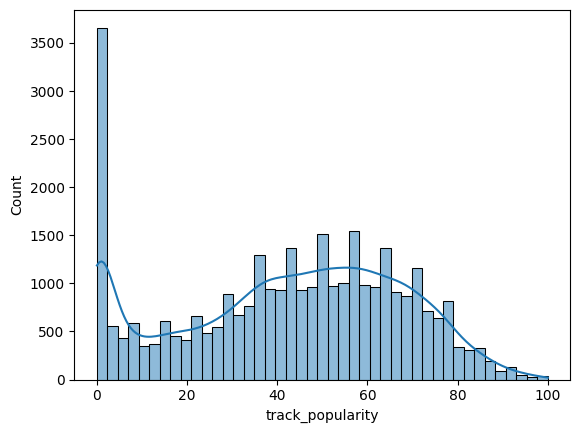

In [23]:
sns.histplot(data=cleaned_data, x='track_popularity',kde=True)
plt.show()

In [24]:
cleaned_data['track_popularity'].describe()

count    32828.000000
mean        42.483551
std         24.980476
min          0.000000
25%         24.000000
50%         45.000000
75%         62.000000
max        100.000000
Name: track_popularity, dtype: float64

In [25]:
cleaned_data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'album_release_year', 'album_release_month'],
      dtype='object')

In [26]:
cleaned_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,6
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,12
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,7
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,7
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,3


**Question**: What is the Distribution of Genre in the Data? Which genre has maximum songs? 

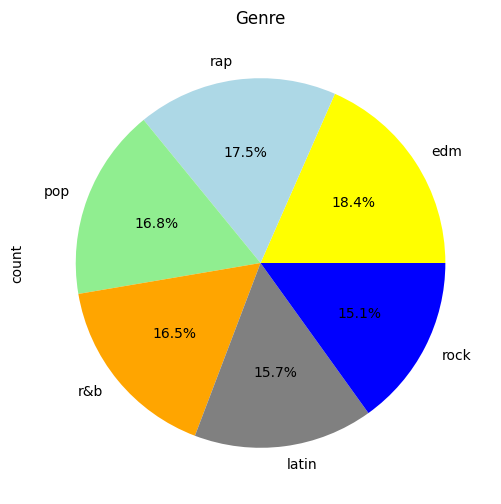

In [27]:
# Define custom colors for the slices
custom_colors = ['yellow', 'lightblue', 'lightgreen', 'orange', 'grey','blue',]
paper = plt.figure(figsize=[10,6])
cleaned_data['playlist_genre'].value_counts().plot.pie(autopct='%3.1f%%',colors=custom_colors)
plt.title('Genre')
plt.show()

**Observations**
- 18.4% of tracks in our dataset is of **'edm'** genre.
- 17.5% of tracks are from **'rap'** genre.
- We will later see which genre is most popular.

**Question**: Which subgenre is most seen in our Dataset?

In [28]:
cleaned_data['playlist_subgenre'].value_counts()

playlist_subgenre
progressive electro house    1809
southern hip hop             1674
indie poptimism              1672
latin hip hop                1655
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1456
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop                      1256
big room                     1206
new jack swing               1133
post-teen pop                1129
permanent wave               1105
album rock                   1065
reggaeton                     948
Name: count, dtype: int64

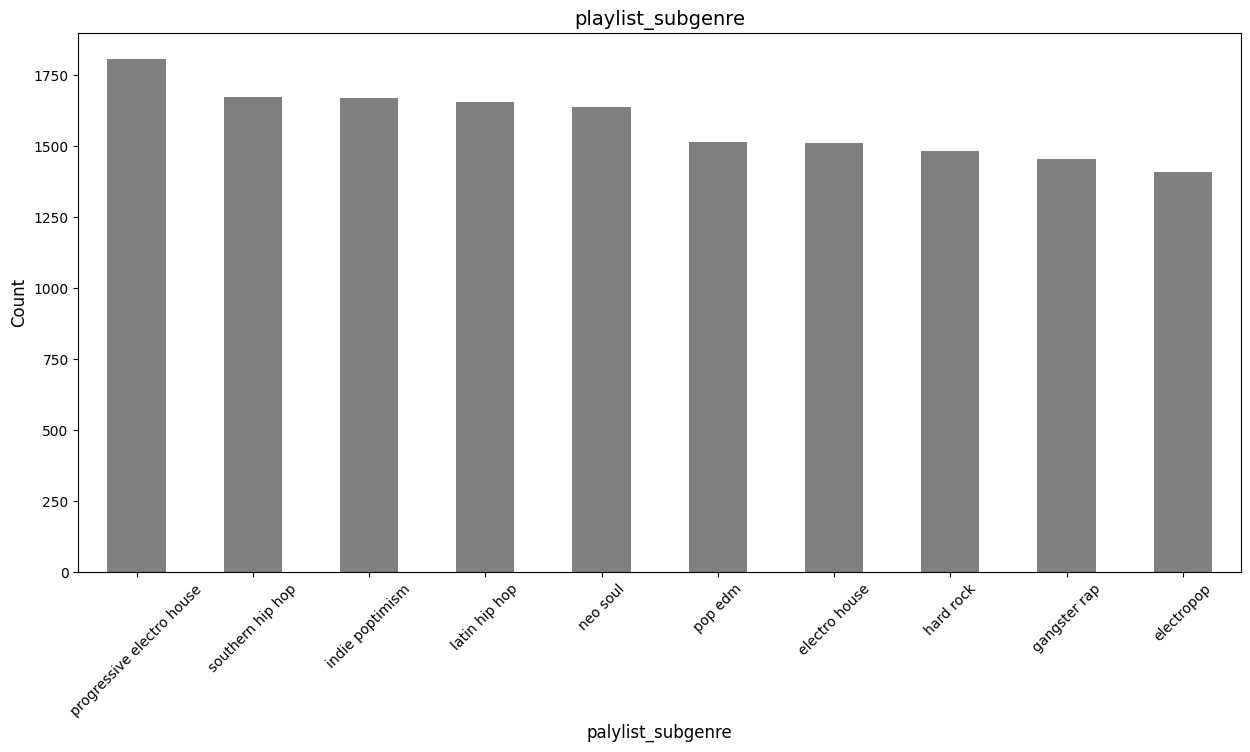

In [29]:
paper = plt.figure(figsize=(15,7))
cleaned_data['playlist_subgenre'].value_counts()[:10].plot.bar(color='grey')
plt.title('playlist_subgenre',size=14)
plt.xlabel('palylist_subgenre',size=12)
plt.ylabel('Count',size=12)
plt.xticks(rotation=45)
plt.show()


**Observations**
- **progressive electro house** subgenre has the maximum songs followed by **southern hip hop**, **indie poptimism** and so on.

**Question**: What is the distribution of the following features - **danceability,energy,loudness,speechiness,acousticness,instrumentalness, liveness,valence and tempo**

In [35]:
# Let's define a function to see the distribution of different features & see if a feature has an Outlier
# I have plotted a Box-plot and Distplot

In [30]:
def plot(col):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})
    sns.boxplot(data=cleaned_data, x=col, ax=axes[0])
    sns.distplot(a=data[col], ax=axes[1], color='#ff4125')
    plt.show()

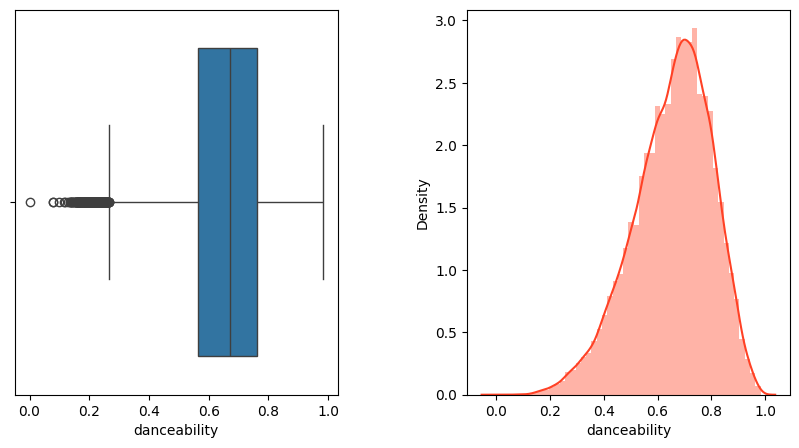

In [31]:
plot('danceability')

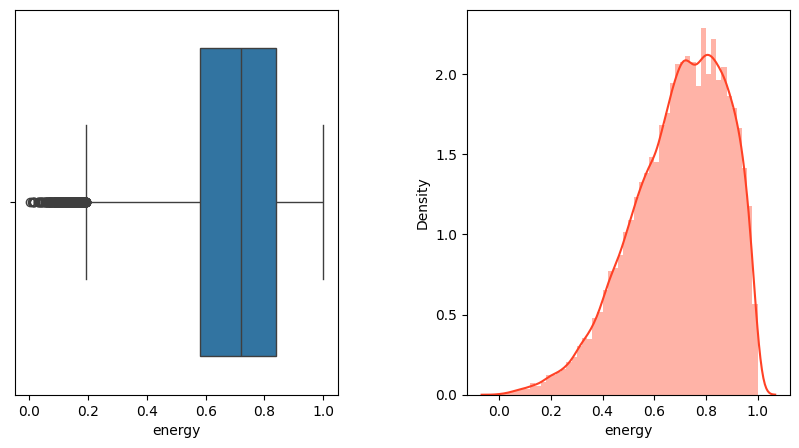

In [32]:
plot('energy')

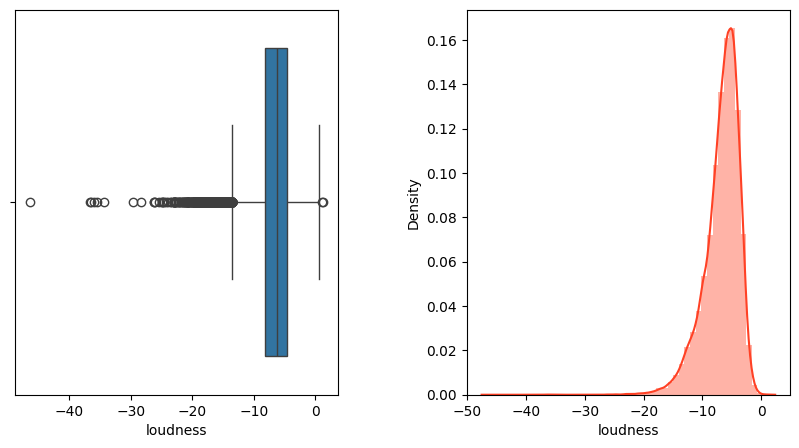

In [33]:
plot('loudness')

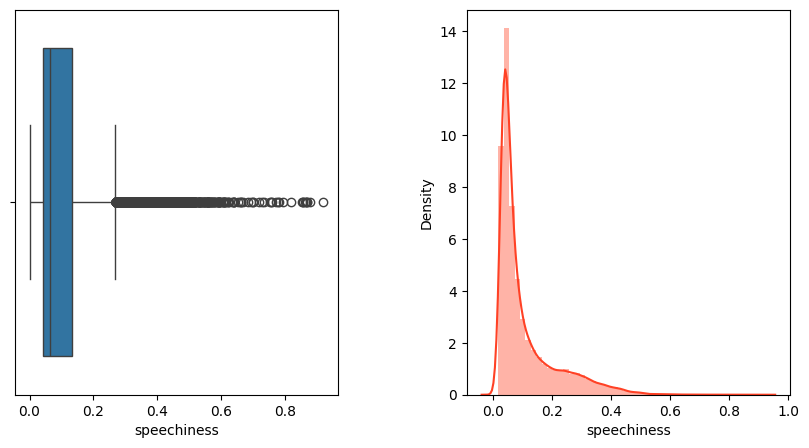

In [34]:
plot('speechiness')

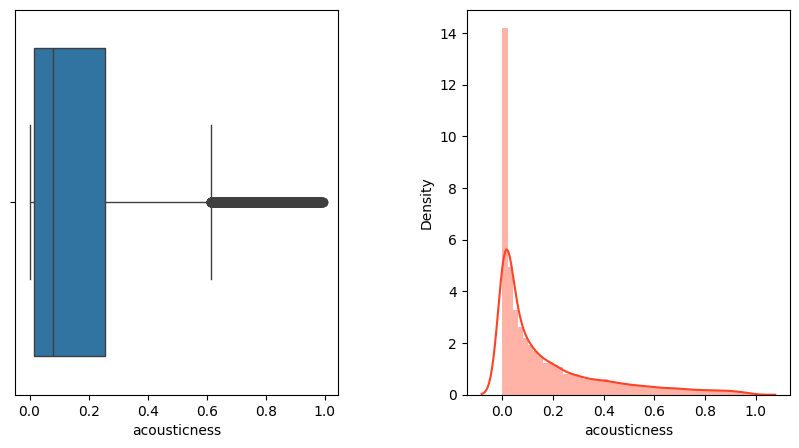

In [35]:
plot('acousticness')

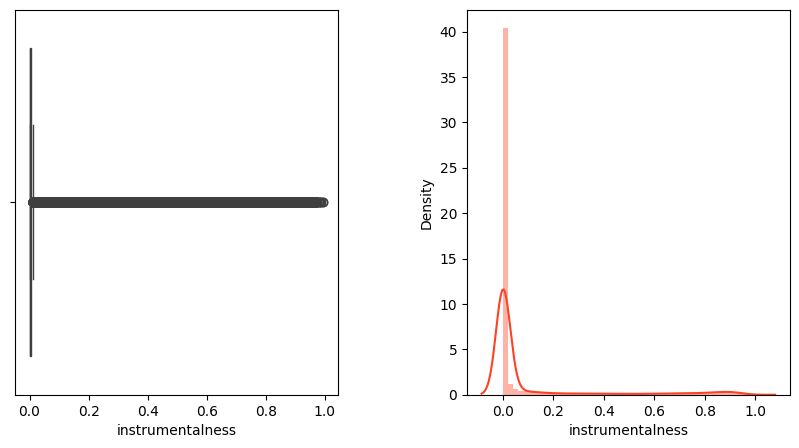

In [36]:
plot('instrumentalness')

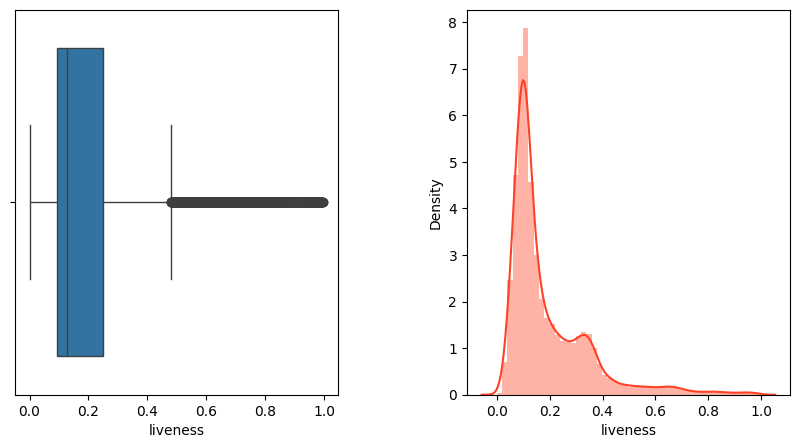

In [37]:
plot('liveness')

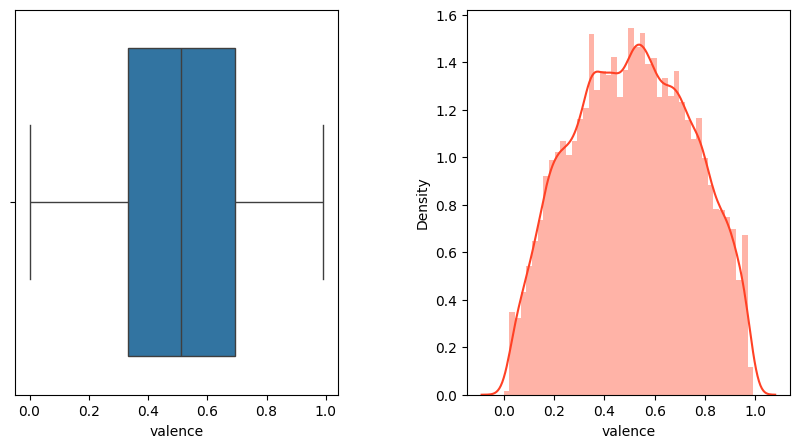

In [38]:
plot('valence')

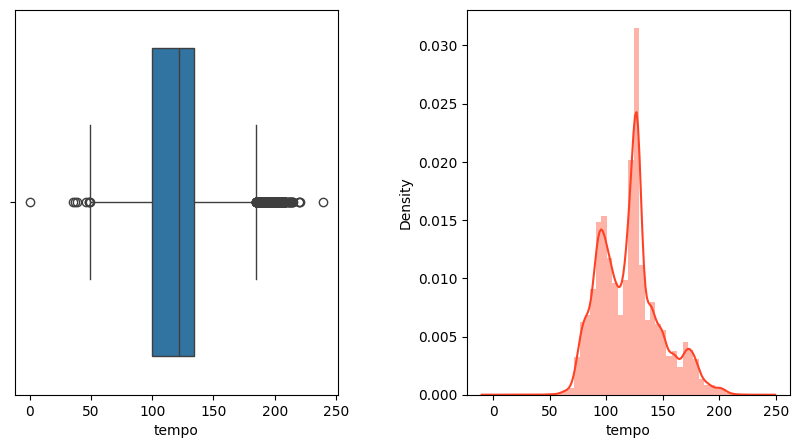

In [39]:
plot('tempo')


**Observations**

- **danceability** feature has few outliers on the left side of the bell shaped curve. Most songs have a danceability value between 0.5 and 0.8. Few songs have 0 danceability value. 
- **energy** feature has also few outliers on the lower side. Few songs have a energy level of 1(Very High).
- Most songs in our playlist have a **loudness** of -10 to 0 decibels. Few songs with less than -10 loudness.
-  Most songs in our Dataset have a **speechiness** of 0.0 - 0.2 which means most of the songs have more of music and non-speech like tracks. Few tracks have very high speechiness of 0.91 which shows these tracks are either talk shows or poetry.
- Mostlt tracks have **acousticness** value between 0 and 0.2. Few tracks have a acousticness of 0.99.
-   **Instrumentaless** and **liveness** has also few outliers on the right side of the curve.
- **valence** is almost normally distributed.
- We have both type of tracks which have very less and very high **tempo** in our dataset. 

**Question**: Which year has the most Release?

In [46]:
#Lets see which years data we have

In [40]:
print(cleaned_data['album_release_year'].max())
print(cleaned_data['album_release_year'].min())

2020
1957


In [41]:
# Lets see which year has how many release
cleaned_data['album_release_year'].value_counts()

album_release_year
2019    9081
2018    3312
2017    2428
2016    2127
2015    1779
        ... 
1960       4
1962       2
1957       2
1958       1
1961       1
Name: count, Length: 63, dtype: int64

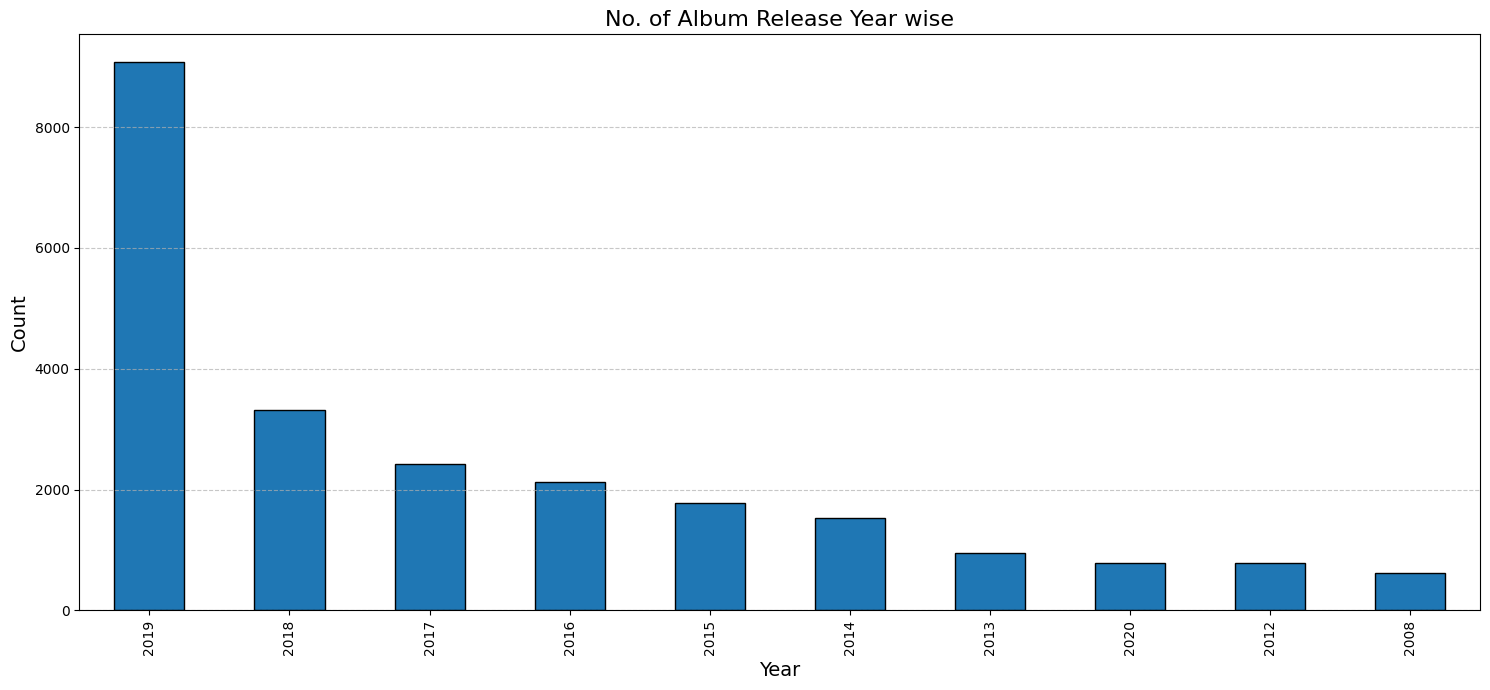

In [42]:
# Lets plot a bar chart
paper = plt.figure(figsize=(15,7))
cleaned_data['album_release_year'].value_counts()[:10].sort_values(ascending=False).plot.bar(edgecolor='black')
plt.xlabel('Year',size=14)
plt.ylabel('Count',size=14)
plt.title('No. of Album Release Year wise',size=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observations**
- We have the data between **1957 and 2020.**
- Maximum songs in our Dataset was released in **2019 followed by 2018,2017,2016 and so on.**


**Question**: Which month of the year has the maximum release?

In [43]:
# Let's see which month has the maximum release
cleaned_data['album_release_month'].value_counts().sort_index()

album_release_month
1     6945
2     1618
3     2014
4     1904
5     2214
6     2390
7     2010
8     2299
9     2543
10    3086
11    3359
12    2446
Name: count, dtype: int64

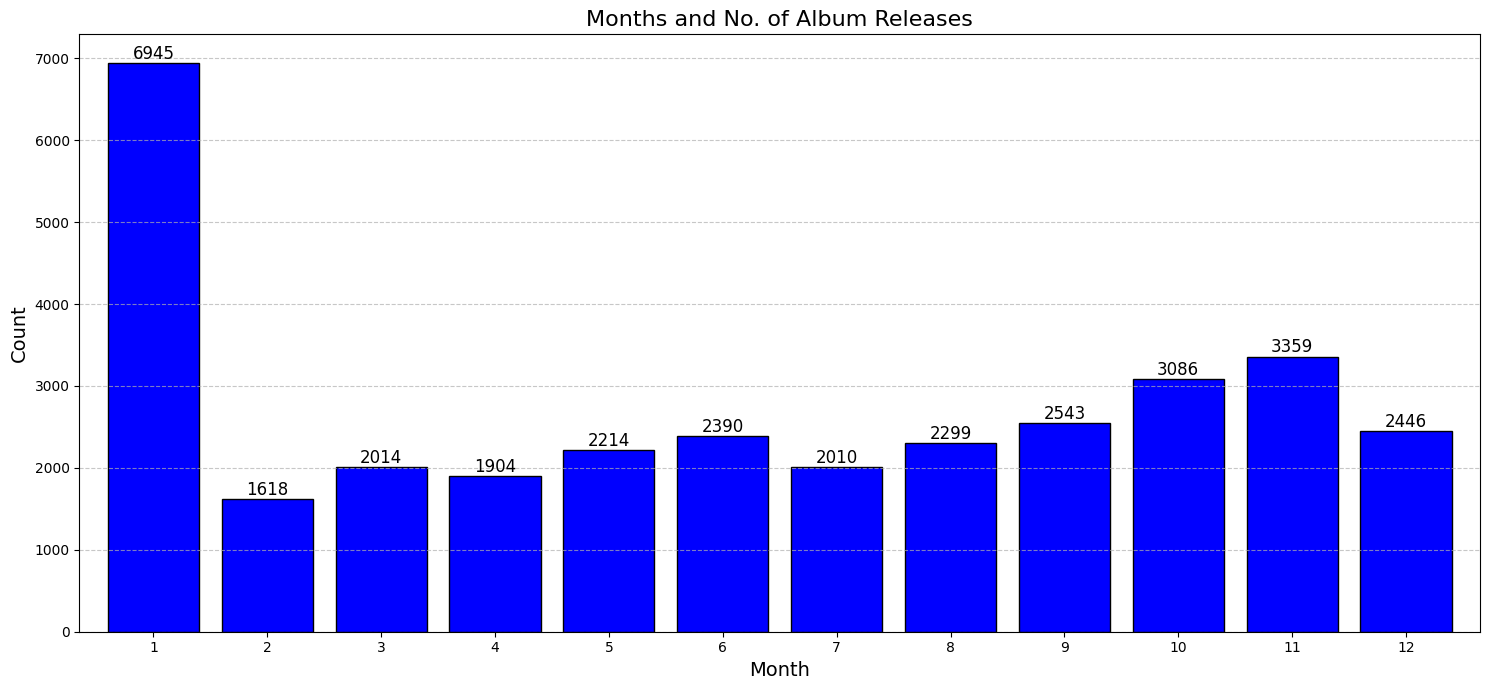

In [44]:
#Lets plot a bar graph
paper = plt.figure(figsize=(15,7))
cleaned_data['album_release_month'].value_counts().sort_index().plot.bar(color='blue', edgecolor='black', width=0.8)
plt.xlabel('Month',size=14)
plt.ylabel('Count',size=14)
plt.xticks(rotation = 0)
plt.title('Months and No. of Album Releases',size=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(cleaned_data['album_release_month'].value_counts().sort_index()):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

**Observations**
- First month of the year i.e. **January has the maximum release followed by November,October and September.**

In [52]:
#Now lets do some Bi-variate Analysis

#### **Bi-variate Analysis**

In [45]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_name             32828 non-null  object 
 8   playlist_id               32828 non-null  object 
 9   playlist_genre            32828 non-null  object 
 10  playlist_subgenre         32828 non-null  object 
 11  danceability              32828 non-null  float64
 12  energy                    32828 non-null  float64
 13  key                       32828 non-null  int64  
 14  loudness   

In [46]:
# Before jumping to the Bi-variate questions lets look at the heatmap
# Lets create a correlation matrix for all numeric columns
num_col = cleaned_data.select_dtypes(exclude='object')

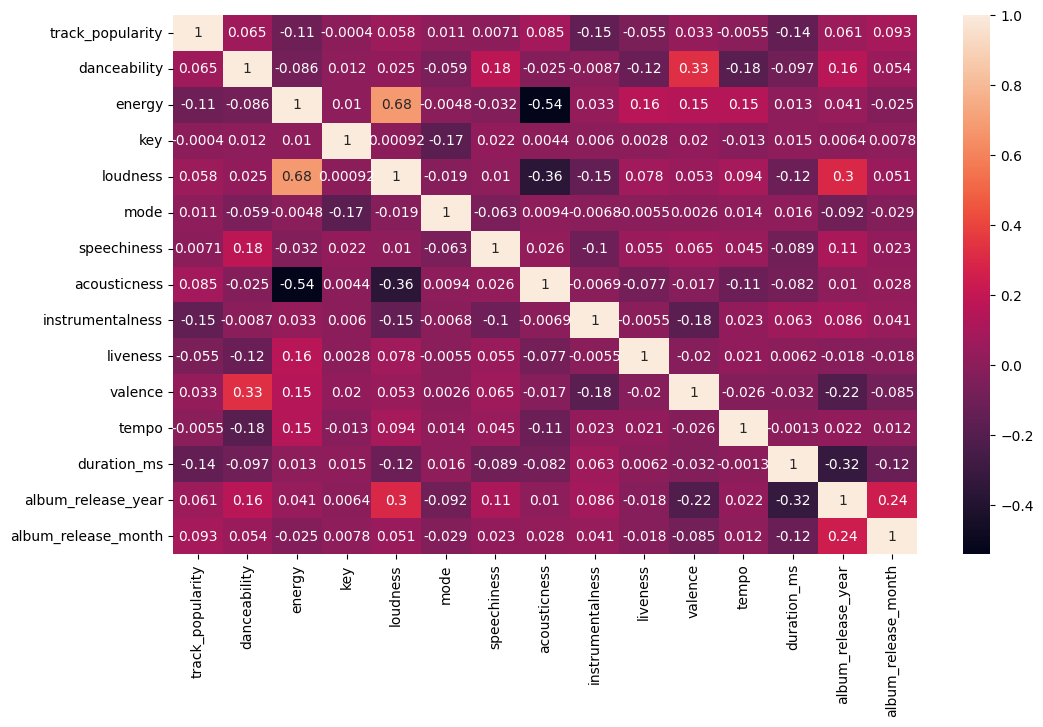

In [47]:
#Now lets plot a Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(num_col.corr(),annot=True)
plt.show()

**Observations**
- **energy** and **loudness** are corelated.
- **acousticness** have a negative co-relation with **energy and loudness**. 

**Question**: Which track is the most and least popular in terms of popularity? Which singer is associated with the most popular track? 

In [48]:
#Lets see which track is most popular
most_popular_index = cleaned_data['track_popularity'].idxmax()
most_popular_track = cleaned_data.loc[most_popular_index, 'track_name']

In [49]:
# Now lets see which track is least popular
least_popular_index = cleaned_data['track_popularity'].idxmin()
least_popular_track = cleaned_data.loc[least_popular_index, 'track_name']

In [50]:
#Lets print both most popular and least popular track
print(f"The most popular track is: {most_popular_track} with popularity {cleaned_data.loc[most_popular_index, 'track_popularity']}")
print(f"The least popular track is: {least_popular_track} with popularity {cleaned_data.loc[least_popular_index, 'track_popularity']}")

The most popular track is: Dance Monkey with popularity 100
The least popular track is: Siren with popularity 0


In [51]:
# Let's see which artist is associated with the most popular track Dance Moneky
most_popular_artist = cleaned_data.loc[most_popular_index,'track_artist']

In [52]:
print(f"The most popular track_artist is: {most_popular_artist}")

The most popular track_artist is: Tones and I


**Observations**:
- The most popular track is **Dance Monkey** with popularity of 100.
- The least popular track is **Siren** with popularity 0 :-(
- **Tones and I** is the singer associated with the most popular song **Dance Moneky.**

**Question**: Which are the top 10 track_artist is terms of mean_track_popularity?

In [53]:
cleaned_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,6
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,12
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,7
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,7
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,3


In [54]:
popular_artists = cleaned_data.groupby(by = 'track_artist')['track_popularity'].mean().sort_values(ascending = False)[:10]
df = pd.DataFrame({'Artist': popular_artists.index , 'Popularity': popular_artists.values})
df

,Artist,Popularity
0,Trevor Daniel,97.000000
1,Y2K,91.000000
2,Don Toliver,90.714286
3,Roddy Ricch,88.210526
4,DaBaby,87.857143
5,Kina,85.400000
6,JACKBOYS,85.166667
7,YNW Melly,84.600000
8,Tainy,84.000000
9,Dadá Boladão,84.000000


**Observations**:
- **Trevor Daniel** is the most popular artist in terms of mean popularity followed by **Y2K, Don Toliver, Roddy Ricch** and so on 

**Question**: Which is the most popular genre?

In [55]:
# Let's see the most popular genre
most_popular_genre = cleaned_data.groupby(by= 'playlist_genre')['track_popularity'].sum().sort_values(ascending=False)
most_popular_genre

playlist_genre
pop      262931
rap      248316
latin    242422
r&b      223885
edm      210499
rock     206597
Name: track_popularity, dtype: int64

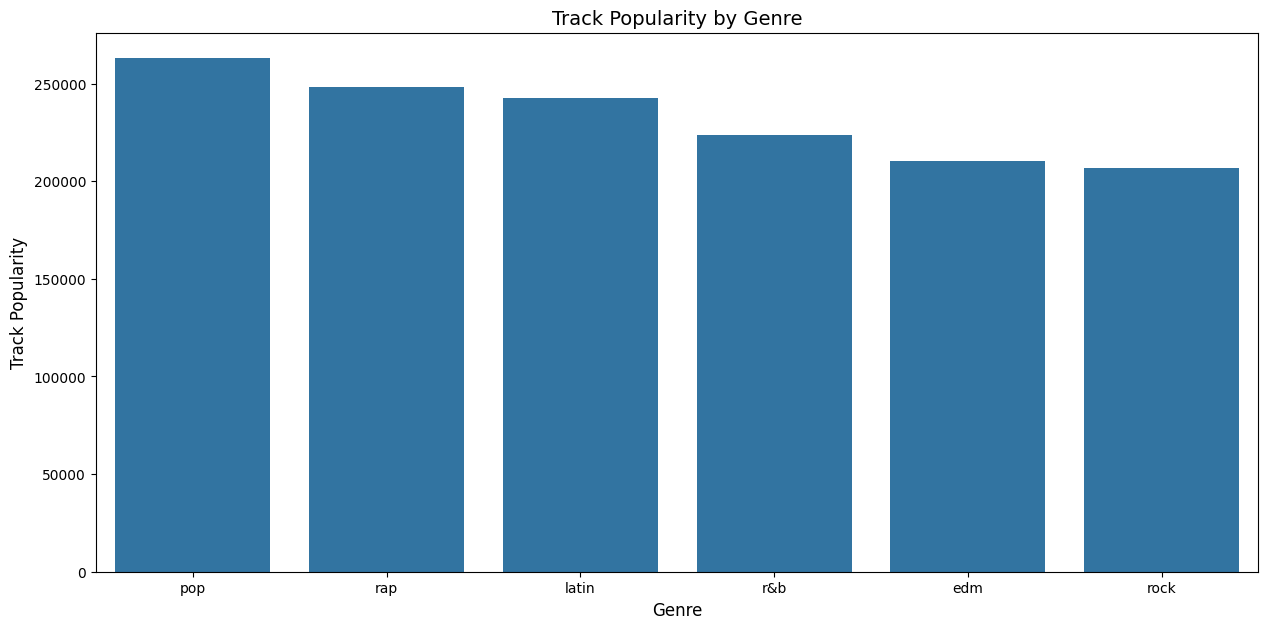

In [56]:
# Let's plot a Bar Graph
paper = plt.figure(figsize=(15,7))
sns.barplot(x=most_popular_genre.index,y=most_popular_genre.values )
plt.xlabel('Genre',size=12)
plt.ylabel('Track Popularity',size=12)
plt.title('Track Popularity by Genre',size=14)
plt.show()

**Observations**:
- **pop** is the most popular genre followed by **rap,latin,r&b,edm and rock**.

In [57]:
cleaned_data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'album_release_year', 'album_release_month'],
      dtype='object')

**Question**: Among the various music genres, which genres tend to exhibit higher levels of danceability

In [58]:
# LEt's see which genre has the higest level of danceability
genre_avg_danceability = cleaned_data.groupby(by='playlist_genre')['danceability'].mean().sort_values(ascending=False)
genre_avg_danceability

playlist_genre
rap      0.718405
latin    0.713295
r&b      0.670179
edm      0.655041
pop      0.639302
rock     0.520548
Name: danceability, dtype: float64

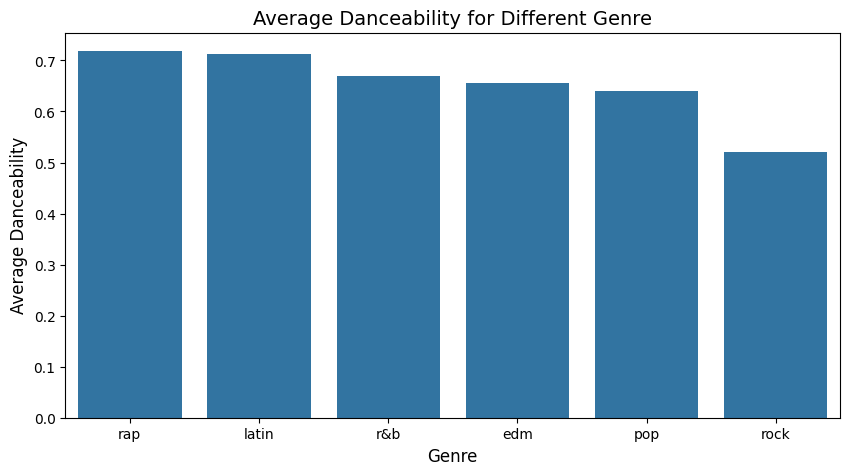

In [59]:
# Lets plot them
paper = plt.figure(figsize=(10,5))
sns.barplot(x=genre_avg_danceability.index,y=genre_avg_danceability.values)
plt.xlabel('Genre',size=12)
plt.ylabel('Average Danceability',size=12)
plt.title('Average Danceability for Different Genre',size=14)
plt.show()

**Observations**:
- **rap** has the highest average danceability value followed by **latin,r&b,edm,pop and rock**
- Higher level of Danceability means genre is suitable for Dancing.

**Question**: Which genre has the highest average Energy level? Also which song has the highest Energy Level ?

In [60]:
# Let's see which genre has the higest average level of Energy
genre_avg_energy = cleaned_data.groupby(by='playlist_genre')['energy'].mean().sort_values(ascending=False)
genre_avg_energy

playlist_genre
edm      0.802476
rock     0.732813
latin    0.708250
pop      0.701028
rap      0.650648
r&b      0.590934
Name: energy, dtype: float64

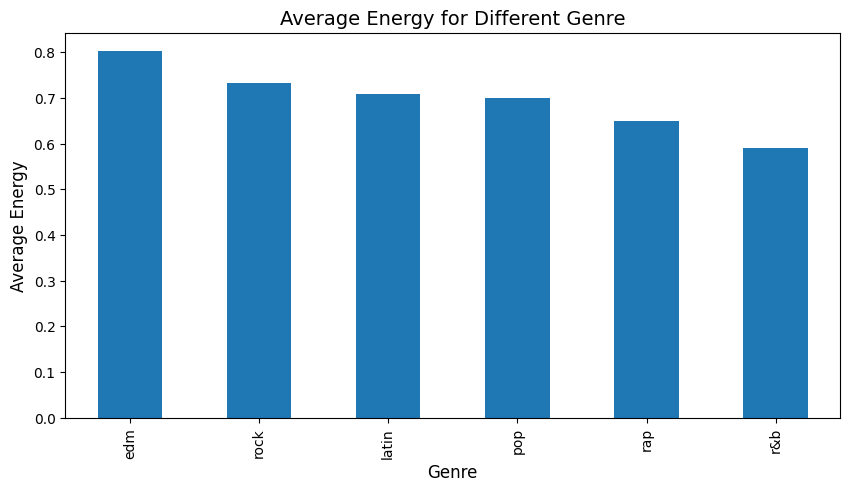

In [61]:
# Lets plot them
paper = plt.figure(figsize=(10,5))
genre_avg_energy.plot.bar()
plt.xlabel('Genre',size=12)
plt.ylabel('Average Energy',size=12)
plt.title('Average Energy for Different Genre',size=14)
plt.show()

In [62]:
# Now let's see which track has the highest energy level
highest_energy_song = cleaned_data.loc[cleaned_data['energy'].idxmax(), ['track_name', 'playlist_genre', 'energy']]
print(f"The song with the highest energy level is '{highest_energy_song['track_name']}' in the '{highest_energy_song['playlist_genre']}' genre with an energy level of {highest_energy_song['energy']:.2f}.")

The song with the highest energy level is 'Rain Forest and Tropical Beach Sound' in the 'latin' genre with an energy level of 1.00.


**Observations**:
- **edm** has the highest average energy level followed by **rock,latin,pop,rap and r&b**
- The song with the highest energy level is **Rain Forest and Tropical Beach Sound** in the **latin genre with an energy level of 1.00.**

In [63]:
cleaned_data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'album_release_year', 'album_release_month'],
      dtype='object')

In [72]:
# Now lets frame few multi-variate questions

#### **Multi-variate Analysis**

**Question:** How does the combination of 'energy', 'danceability', and 'valence' vary across different 'playlist_genre'?

In [73]:
#Lets create a pairplot to to visualize the relationships across different genres

In [64]:
# Selecting relevant columns
selected_columns = ['energy', 'danceability', 'valence', 'playlist_genre']

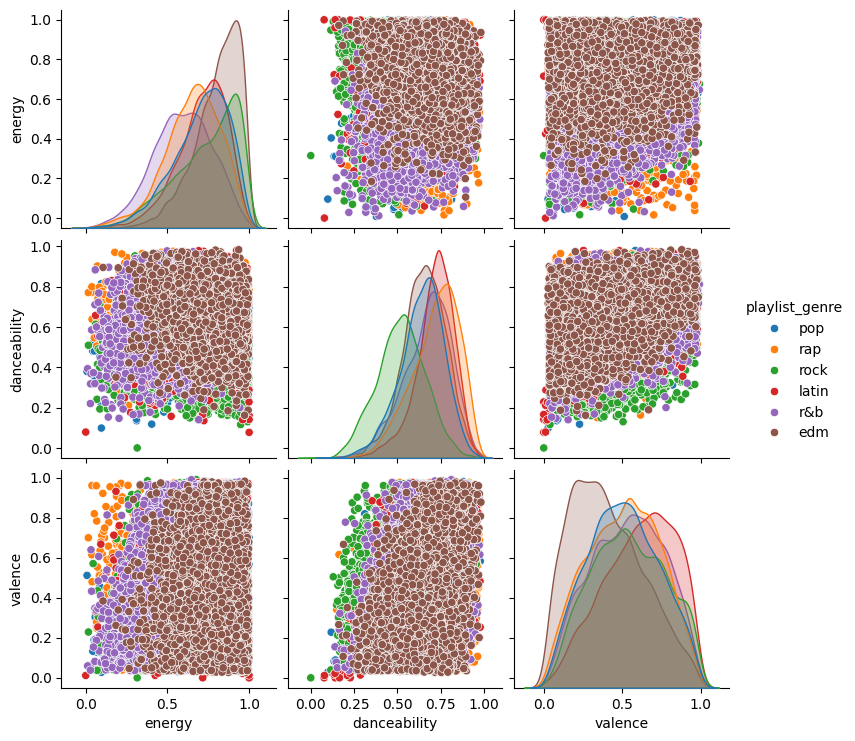

In [65]:
sns.pairplot(cleaned_data[selected_columns], hue='playlist_genre')
plt.show()

**Observations**:
- **edm** songs tends to be more energetic and have a higher valence and **r&b** genre songs tends to be least energetic. 
- **latin** genre is most suitable for dancing.
- Few **rap** songs are very less energetic, few of them have very high **danceability** and **valence**

**Question**: How does the 'loudness', 'tempo', and 'energy' interact within tracks from different 'track_album_name' categories?

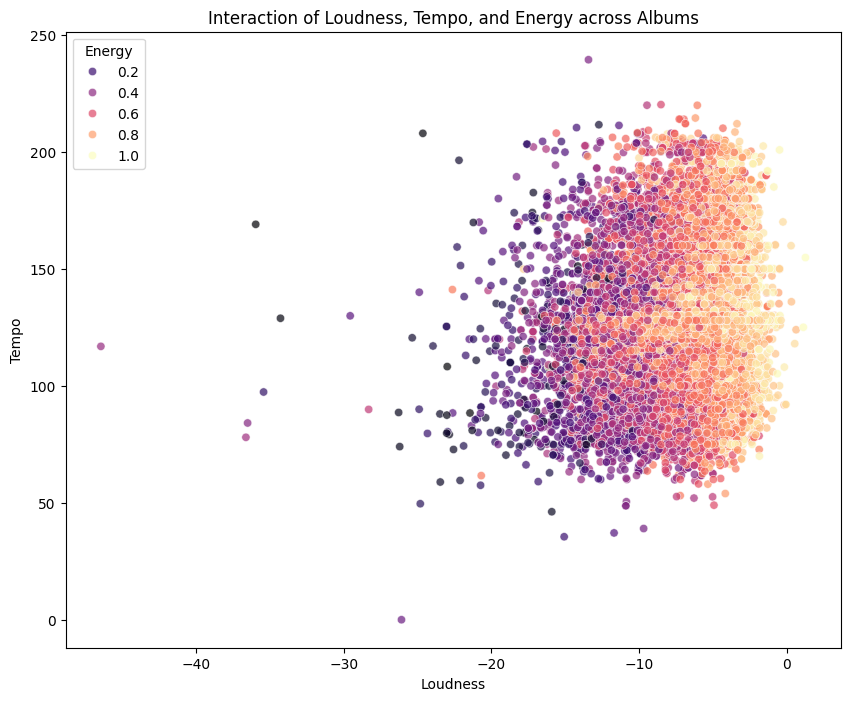

In [66]:
#  Let's plot a Scatterplot for loudness vs tempo 
plt.figure(figsize=(10, 8))
sns.scatterplot(x='loudness', y='tempo', hue='energy', data=cleaned_data, palette='magma', alpha=0.7)
plt.title('Interaction of Loudness, Tempo, and Energy across Albums')
plt.xlabel('Loudness')
plt.ylabel('Tempo')
plt.legend(title='Energy')
plt.show()

**Observations**:
- Most of the tracks have a loudness between -20db to 0db.
- Tracks which have loudness closer to 1 generally seen to have **High Energy.**
- Majority of tracks have a tempo of 100 - 200
- Tracks having higher loudness and high tempo are generally Energetic Tracks.

## 5.Conclusion 

- We have done Exploratory Data analysis for different features.
- **Martin Garrix** has the maximum number of Songs in the dataset followed by **Queen,The Chainsmokers,David Guetta etc.**
- **18.4%** of tracks in our dataset is of **'edm'** genre.
- **17.5%** of tracks are from **'rap'** genre.
- **progressive electro house** subgenre has the maximum songs followed by **southern hip hop, indie poptimism and so on.
- **danceability** feature has few outliers on the left side of the bell shaped curve. 
- Most songs have a **danceability value between 0.5 and 0.8. Few songs have 0 danceability value.**
- energy feature has also few outliers on the lower side. Few songs have a energy level of 1(Very High).
- Most songs in our playlist have a loudness of -10 to 0 decibels. Few songs with less than -10 loudness.
- Most songs in our Dataset have a **speechiness of 0.0 - 0.2** which means most of the songs have more of music and non-speech like tracks. Few tracks have very high speechiness of 0.91 which shows these tracks are either talk shows or poetry.
- Mostlt tracks have **acousticness value between 0 and 0.2.** Few tracks have a acousticness of 0.99.
- **Instrumentaless and liveness** has also few outliers on the right side of the curve.
- valence is almost normally distributed.
- We have both type of tracks which have very less and very high tempo in our dataset.
- We have the data between **1957 and 2020.**
- Maximum songs in our Dataset was released in **2019 followed by 2018,2017,2016 and so on.**
- **First month of the year i.e. January has the maximum release followed by November,October and September.**
- **energy and loudness are corelated.**
- **acousticness have a negative co-relation with energy and loudness.**
- The most popular track is **Dance Monkey with popularity of 100.
- The least popular track is **Siren with popularity 0 :-(
- **Tones and I** is the singer associated with the **most popular song Dance Moneky.**
- **Trevor Daniel** is the most popular artist in terms of mean popularity followed by **Y2K, Don Toliver, Roddy Ricch** and so on
- **pop is the most popular genre followed by rap,latin,r&b,edm and rock.**
- **rap has the highest average danceability value followed by latin,r&b,edm,pop and rock.**
- Higher level of Danceability means genre is suitable for Dancing.
- **edm has the highest average energy level followed by rock,latin,pop,rap and r&b.**
- The song with the highest energy level is **Rain Forest and Tropical Beach Sound in the latin genre with an energy level of 1.00.**
- **edm songs tends to be more energetic and have a higher valence and r&b genre songs tends to be least energetic.**
- **latin genre is most suitable for dancing.**
- **Few rap songs are very less energetic, few of them have very high danceability and valence.**
- **Most of the tracks have a loudness between -20db to 0db.**
- **Tracks which have loudness closer to 1 generally seen to have High Energy.**
- **Majority of tracks have a tempo of 100 - 200.**
- **Tracks having higher loudness and high tempo are generally Energetic Tracks.**

> If you have any question please comment and let me know.

> #### If you like this Notebook pls give me an upvote.
>> **Thank-you :)**
